This notebook is a part of the series about using ProcessOptimizer to guide a gold
mining expedition. For an overview, go to the markdown file gold_mining.md

We continue after having done the initial prospecting.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer

#Setting random seed to ensure reproducible behaviour
np.random.seed(42)

coordinates = [(0, 15.01),(0,15.01)]
space = ProcessOptimizer.space.space.Space(coordinates)

def score(coordinates, silent = False):
    """ Modified Branin-Hoo function. It has three minima with f(x*) = 0.397887 
    More details: <http://www.sfu.ca/~ssurjano/branin.html>
    """
    x = 10-coordinates[0]
    y = coordinates[1]
    gold_found = (((y - 5.1 / (4 * np.pi**2) * x ** 2 + 5. / np.pi * x - 6) ** 2 +
                10 * (1 - 1. / (8 * np.pi)) * np.cos(x) + 10)-309)/100
    if not silent:
        print(f"We dug at {coordinates} and found {round(-gold_found*10)/10} mg gold.")
    return gold_found

opt = ProcessOptimizer.optimizer.optimizer.Optimizer(dimensions=space)
# Finding the 10 first positions
initial_points = opt.ask(10)
# Digging for gold
gold_found = [score(coordinates) for coordinates in initial_points]
# Telling the optimiser how much gold we found
result = opt.tell(initial_points, gold_found)

We dug at [12.7585, 5.2535] and found 270.5 mg gold.
We dug at [2.2515, 14.2595] and found 133.2 mg gold.
We dug at [8.255500000000001, 9.7565] and found 263.0 mg gold.
We dug at [0.7505000000000001, 12.7585] and found 199.7 mg gold.
We dug at [11.2575, 3.7525] and found 276.2 mg gold.
We dug at [3.7525, 8.255500000000001] and found 238.2 mg gold.
We dug at [14.2595, 2.2515] and found 137.5 mg gold.
We dug at [6.7545, 11.2575] and found 226.4 mg gold.
We dug at [5.2535, 0.7505000000000001] and found 298.3 mg gold.
We dug at [9.7565, 6.7545] and found 288.4 mg gold.


Last time, we send Mr. Dixon's team out for one dig at a time.

We dug at [5.287031891957435, 0.7957055894836804] and found 298.7 mg gold.


array([[<AxesSubplot:xlabel='E-W', ylabel='Dependence'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='E-W', ylabel='N-S'>,
        <AxesSubplot:xlabel='N-S', ylabel='Dependence'>]], dtype=object)

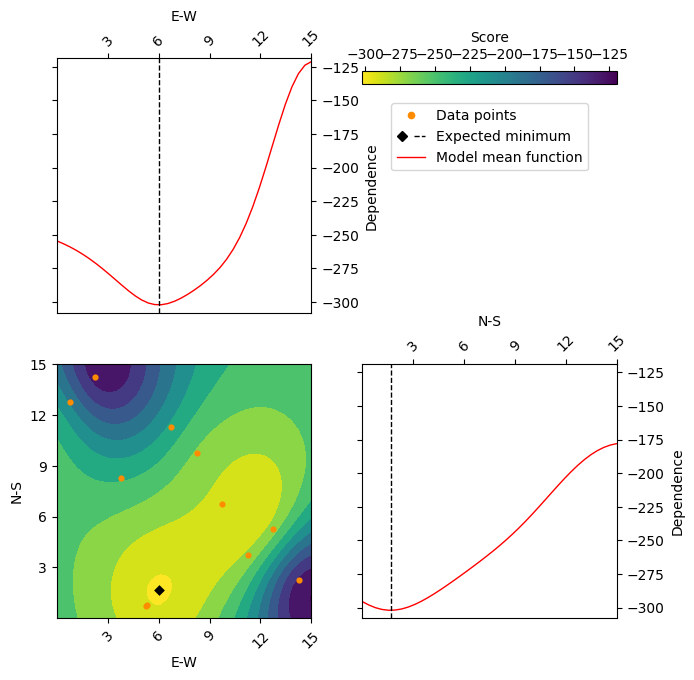

In [40]:
# Finding new dig site.
new_dig_site=opt.ask()
# Digging and finding gold.
gold_found = score(new_dig_site)
# Telling ProcessOptimizer how much gold we found at the new dig site
opt.tell(new_dig_site,gold_found)
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"])

But after talking to Mr. Dixon, we learn that the team spends a lot of time driving back and forth between the headquarters and the plot. So they would be much more efficient if they could get a list of, say, 5 sets of coordinates to dig at at a time. We can do this by setting the `n_points` parameter of the `opt.ask()` method: 

Going out on tour number 1
We dug at [5.387530568877782, 0.9313125313330219] and found 299.7 mg gold.
We dug at [13.496043844329737, 10.489474730796504] and found 301.0 mg gold.
We dug at [1.6117956185980131, 6.136198688670027] and found 284.6 mg gold.
We dug at [10.458474218918107, 13.54236341427504] and found 244.3 mg gold.
We dug at [7.386595505580235, 4.564981955153367] and found 303.9 mg gold.
Going out on tour number 2
We dug at [0.0, 0.0] and found 298.0 mg gold.
We dug at [11.893033219260037, 8.810284970331908] and found 301.6 mg gold.
We dug at [3.0701250993800167, 3.381800614555475] and found 286.5 mg gold.
We dug at [9.101913212284103, 12.243284544068008] and found 235.7 mg gold.
We dug at [6.012780887336799, 7.389974359831475] and found 273.1 mg gold.
Going out on tour number 3
We dug at [7.3276599366173665, 4.298924746141634] and found 304.9 mg gold.
We dug at [14.7230540151734, 7.762012585445404] and found 224.3 mg gold.
We dug at [2.7676512969508487, 10.844151600389702] 

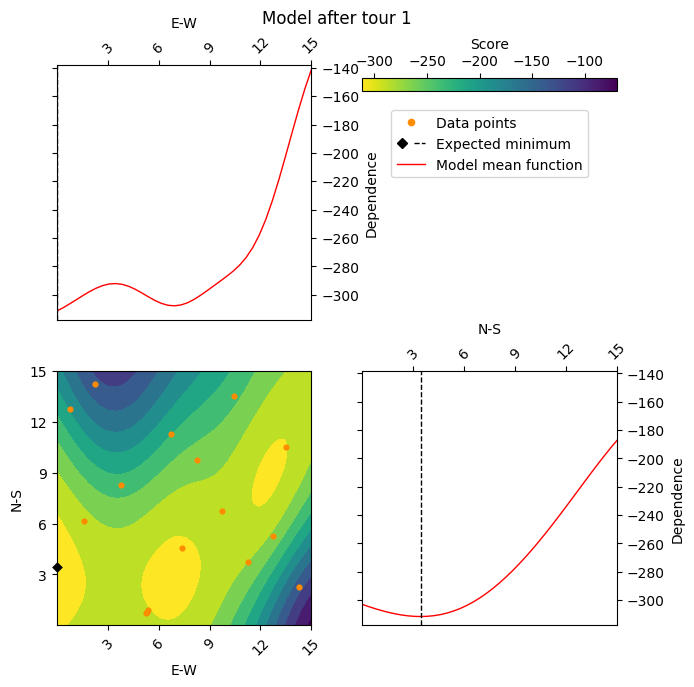

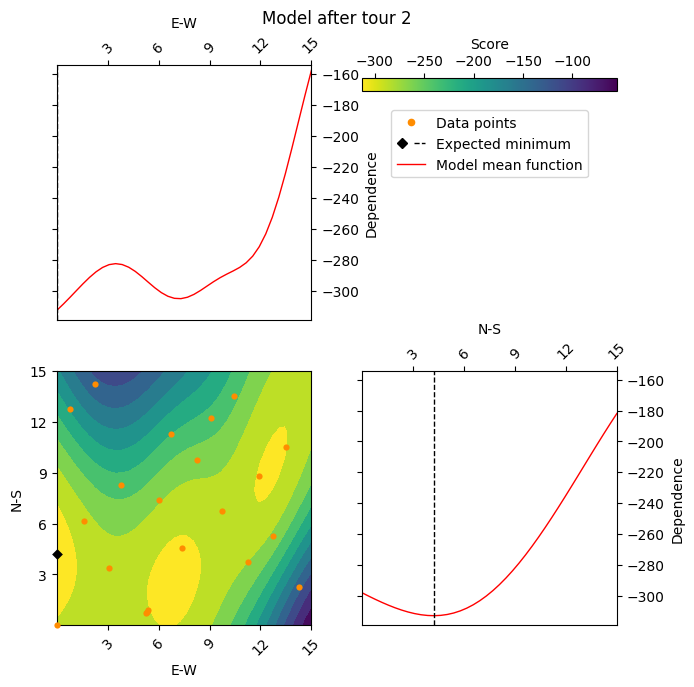

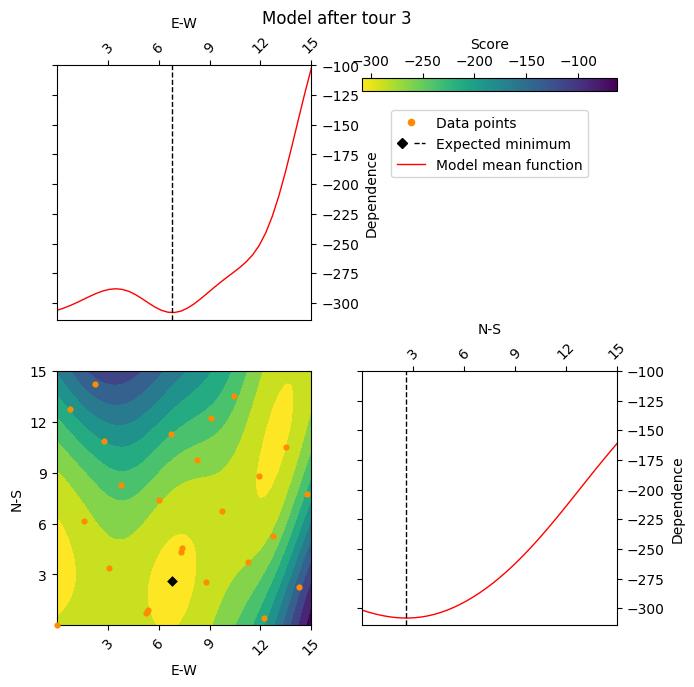

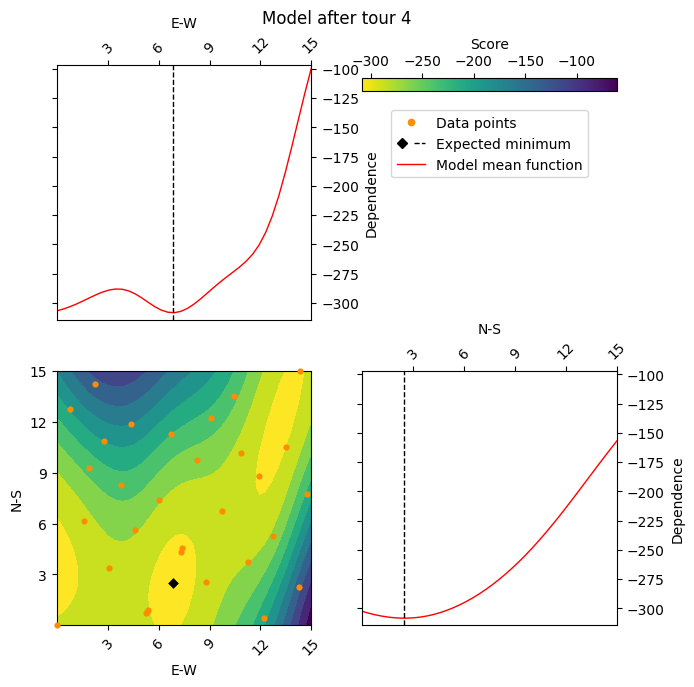

In [41]:
for tour_number in range(4):
    print(f"Going out on tour number {tour_number+1}")
    # Finding five new spots to dig at
    new_position_list = opt.ask(n_points=5)
    # Starting the list of results of digs.
    gold_found = []
    for dig_number in range(len(new_position_list)):
        # Fishing out the next position
        dig_position = new_position_list[dig_number]
        # Digging and adding the result to the list of results of digs
        gold_found.append(score(dig_position))
    # Telling the ProcessOptimizer about the result of the five digs
    opt.tell(new_position_list, gold_found)
    ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"],title=f"Model after tour {tour_number+1}")